In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import calendar
from wordcloud import WordCloud
import geopandas as gpd
import mplleaflet
df = pd.read_csv('data/netflix_titles.csv')

In [4]:
df2 = df.copy()

In [5]:
#df2["release_year"] = df2["release_year"].astype(float)

In [6]:
df2["date_added"] = pd.to_datetime(df2["date_added"], errors="coerce")

In [7]:
df2.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df2[df2["date_added"].isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6177,s6178,TV Show,忍者ハットリくん,NaN,NaN,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."
6213,s6214,TV Show,Bad Education,NaN,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf..."


In [9]:
df2.dropna(subset=["date_added"], axis=0, inplace=True)

In [10]:
df2.isna().sum()

show_id            0
type               0
title              0
director        2541
cast             817
country          827
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
df2["country"].fillna("Unknown", inplace=True)

In [12]:
df2["cast"].fillna("Unknown", inplace=True)

In [13]:
df2["director"].fillna("Unknown", inplace=True)

In [14]:
df2["rating"].fillna("NR", inplace=True)

In [15]:
df2["duration"].fillna("1 Season", inplace=True)

In [16]:
df2["rating"].value_counts()

rating
TV-MA       3183
TV-14       2133
TV-PG        838
R            799
PG-13        490
TV-Y7        330
TV-Y         300
PG           287
TV-G         212
NR            82
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [17]:
df2[df2["rating"] == "84 min"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [18]:
df2["rating"].iloc[5794] = "NR"

In [19]:
df2["duration"].iloc[5794] = "84 min"

In [20]:
df2[df2["rating"] == "74 min"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [21]:
df2["duration"].iloc[5541] = "74 min"

In [22]:
df2["rating"].iloc[5541] = "NR"

In [23]:
df2[df2["rating"] == "66 min"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,1 Season,Movies,The comic puts his trademark hilarious/thought...


In [24]:
df2["duration"].iloc[5813] = "66 min"

In [25]:
df2["rating"].iloc[5813] = "NR"

In [26]:
df2.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
df2["rating"].value_counts()

rating
TV-MA       3183
TV-14       2133
TV-PG        838
R            799
PG-13        490
TV-Y7        330
TV-Y         300
PG           287
TV-G         212
NR            85
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

In [28]:
df2["rating"] = df2["rating"].str.upper()

In [29]:
df2["type"] = df2["type"].str.upper()

In [30]:
df2[["type", "duration"]].head(1)

,type,duration
0,MOVIE,90 min


**************************************************************
**************************************************************
**************************************************************
**************************************************************

* SPLIT "date_added" COLUMN TO TWO COLUMNS == YEAR, MONTH FOR FURTHER ANALYSIS
* CHECK IF "TV SHOW" == "%Season%" and "MOVIE" == "%min%"
* IDENTIFY ANY NEW FINDINGS OR IDEAS ON SATURDAY'S CLASS

**************************************************************
**************************************************************
**************************************************************
**************************************************************


In [42]:
custom_colors = ["#c50914","#ffffff"]

In [33]:
df2["Month Added"] = df2["date_added"].dt.strftime("%B")

In [34]:
df2["Year Added"] = df2["date_added"].dt.year

In [35]:
df2.columns = ['show_d', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genre', 'description',
       'Month Added', 'Year Added']

In [36]:
df2.head(1)

,show_d,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,Month Added,Year Added
0,s1,MOVIE,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021


In [37]:
df2[df2["type"] == "TV SHOW"]["duration"].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons'],
      dtype=object)

In [38]:
df2[df2["country"].str.contains("United States")].head(1)

,show_d,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,Month Added,Year Added
0,s1,MOVIE,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021


In [158]:
rating = df2[df2["rating"] != "NR"].groupby(["rating"]).size().reset_index(name="Count").sort_values(by="Count",axis=0, ascending=False)

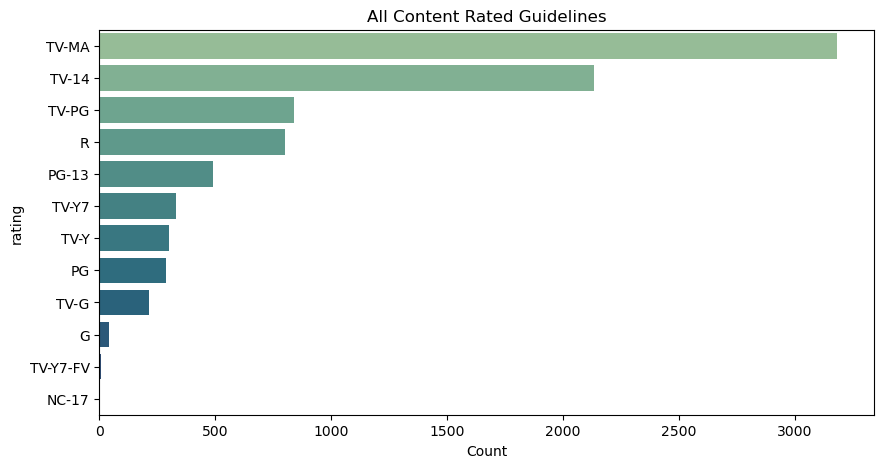

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(data=rating[rating["rating"] != "UR"], y="rating", x="Count", palette = "crest")
plt.title("All Content Rated Guidelines");

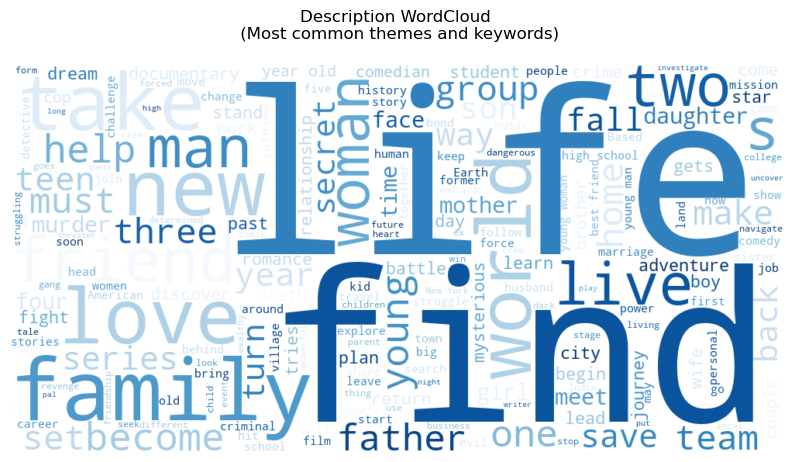

In [203]:
text = " ".join(desc for desc in df2["description"])

wordcloud = WordCloud(width=1000, height=500, background_color="white", colormap="Blues", mode="RGB").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Description WordCloud \n (Most common themes and keywords)\n")
plt.show()

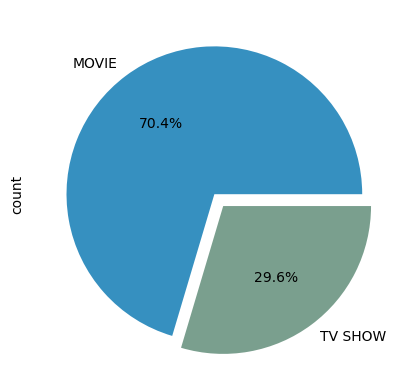

In [64]:
df2["type"].value_counts().plot(kind="pie", explode=(0,0.1), colors=("#3690c0", "#7a9f8e"), autopct="%1.1f%%");

In [48]:
df2["type"].value_counts()

type
MOVIE      6131
TV SHOW    2578
Name: count, dtype: int64

In [53]:
label_order=['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 
       'TV-G', 'G', 'TV-Y7-FV','NC-17']

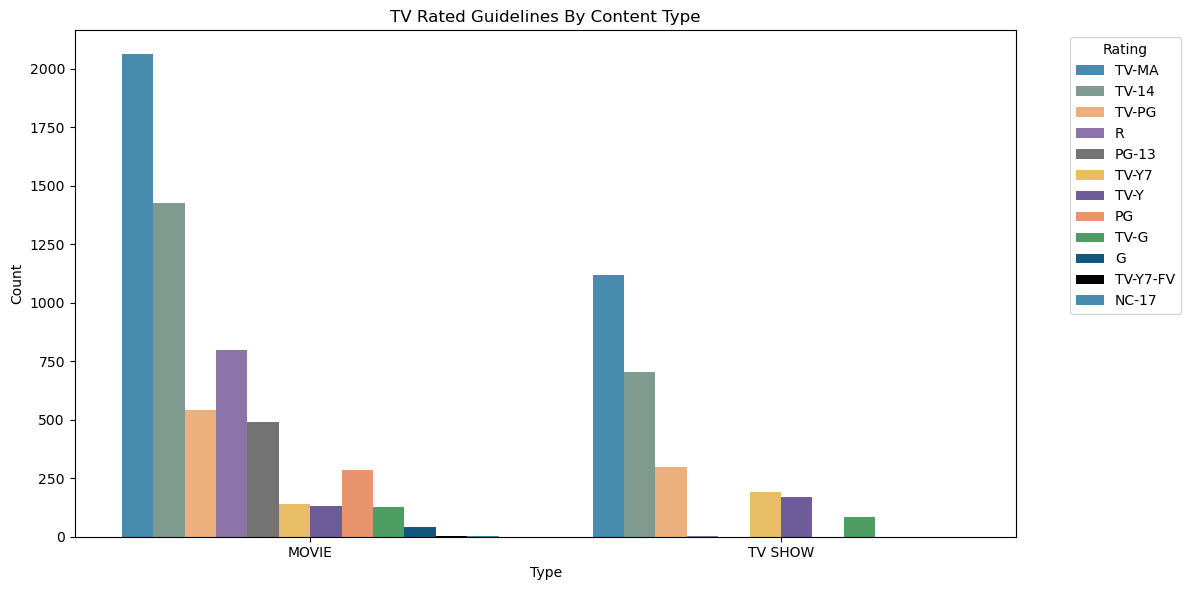

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='type', hue='rating', hue_order=label_order, palette=["#3690c0", "#7a9f8e",  "#fdae6b", "#8c6bb1", "#737373", "#fec44f","#6a51a3", "#fc8d59","#41ab5d", "#045a8d",  "#000000"])
plt.title("TV Rated Guidelines By Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

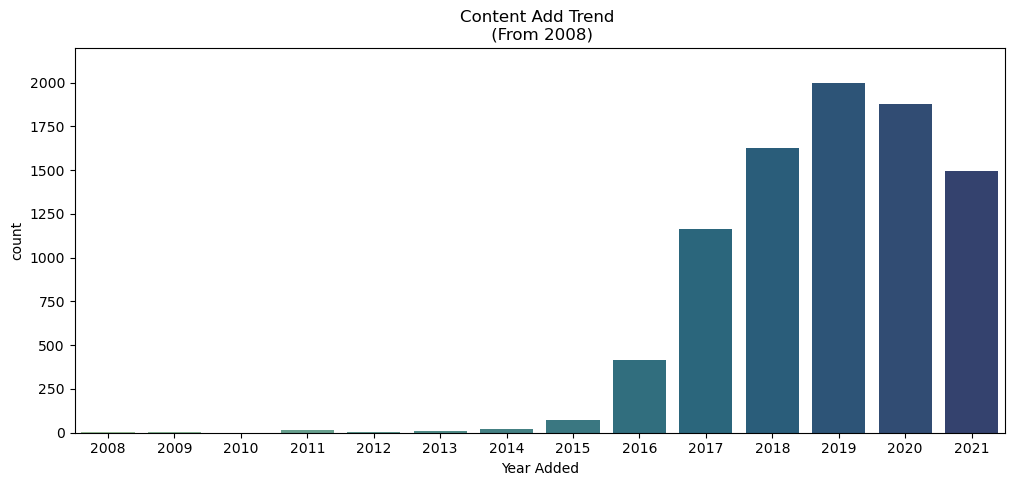

In [91]:
plt.figure(figsize=(12,5))
sns.countplot(x = df2['Year Added'], palette = "crest");
plt.title("Content Add Trend \n (From 2008)");
plt.ylim(0, 2200);

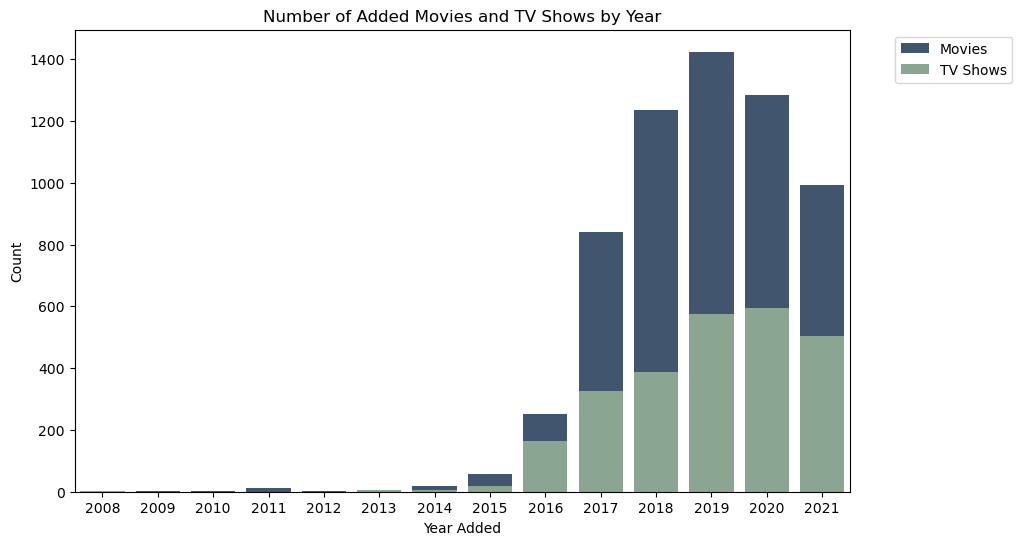

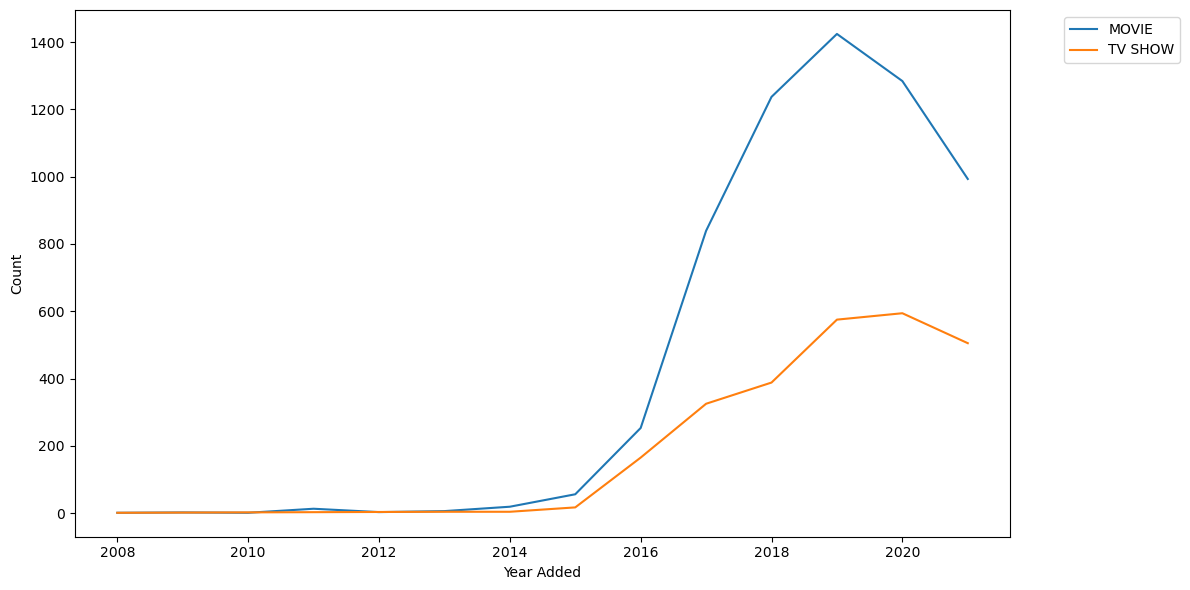

In [192]:
add_counts3 = df3[df3["Year Added"] >= 2008].groupby(["Year Added", "type"]).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.barplot(data=add_counts3, x=data_counts.index, y="MOVIE", color="#3b5476", label="Movies")
sns.barplot(data=add_counts3, x=data_counts.index, y="TV SHOW", color="#87a991", label="TV Shows")
plt.legend()
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.title("Number of Added Movies and TV Shows by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

data_counts4 = df3[df3["Year Added"] >= 2008].groupby(["Year Added", "type"]).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_counts4, x="Year Added", y="count", hue="type")
#plt.title("Number of Added Movies and TV Shows by Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

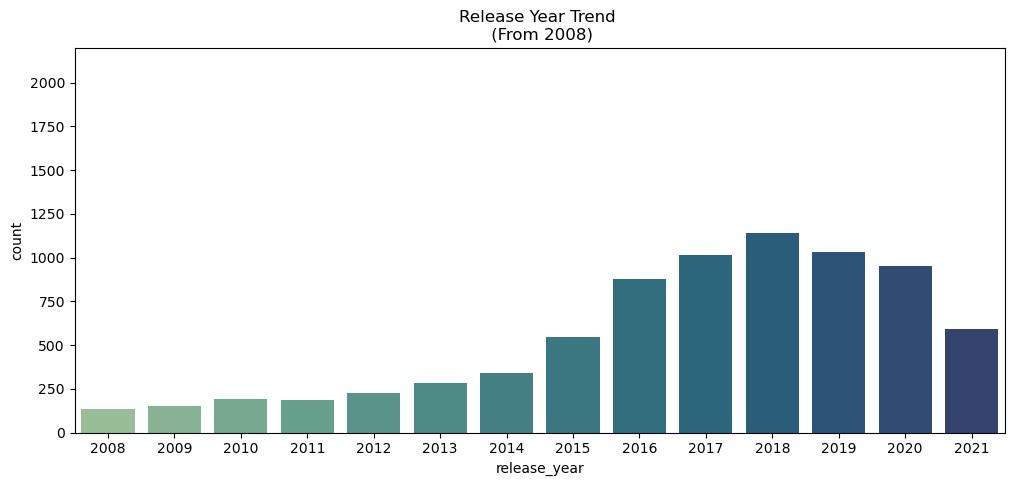

In [93]:
plt.figure(figsize=(12,5))
#plt.xticks(rotation = 90)
#plt.tick_params(labelsize=9)
sns.countplot(x = df2[df2["release_year"] > 2007]["release_year"], palette = "crest");
plt.title("Release Year Trend \n (From 2008)");
plt.ylim(0, 2200);

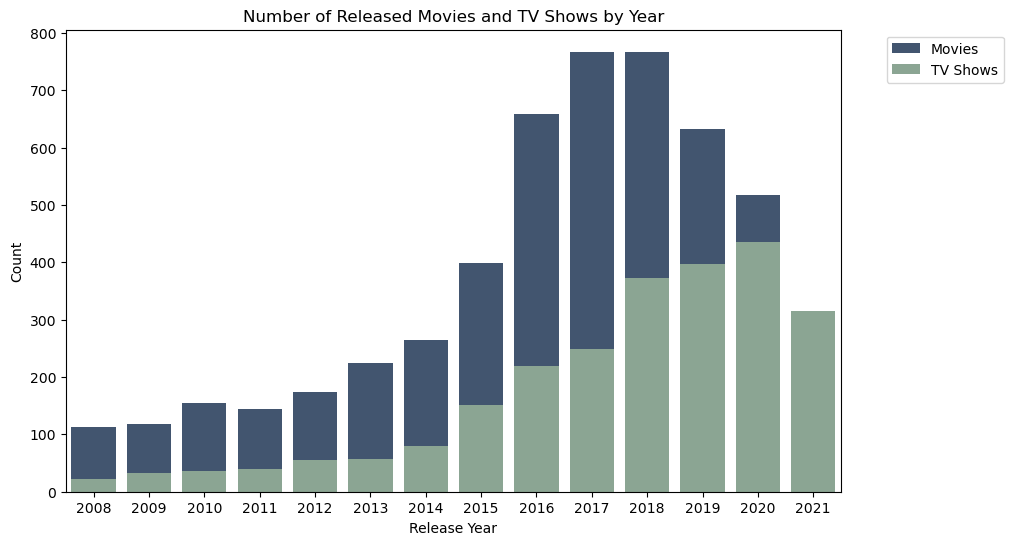

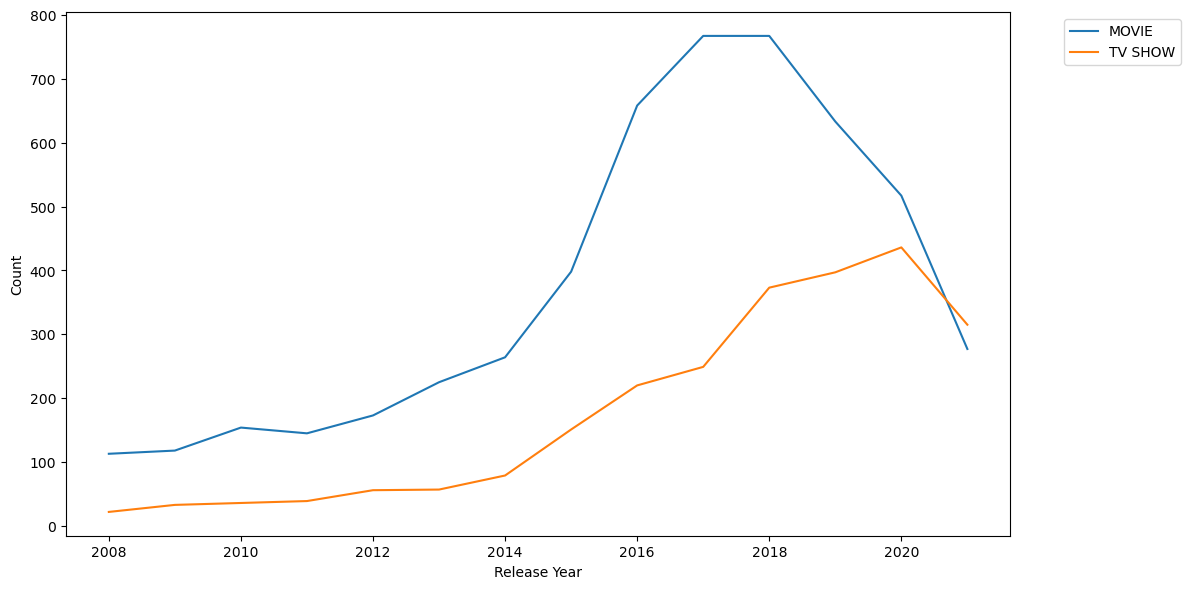

In [191]:
data_counts = df3[df3["release_year"] >= 2008].groupby(["release_year", "type"]).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.barplot(data=data_counts, x=data_counts.index, y="MOVIE", color="#3b5476", label="Movies")
sns.barplot(data=data_counts, x=data_counts.index, y="TV SHOW", color="#87a991", label="TV Shows")
plt.legend()
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Number of Released Movies and TV Shows by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

data_counts2 = df3[df3["release_year"] >= 2008].groupby(["release_year", "type"]).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_counts2, x="release_year", y="count", hue="type")
#plt.title("Number of Released Movies and TV Shows by Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Summary:

* Content on Netflix : movies -  , TV shows - .
* The highest number of shows was added in the year 2019.
* The highest  ratings for shows on Netflix are 'TV-MA'
* Most common keywords from the description
* Genre and count – popular genre
* Country and count – popular country 

In [95]:
#MADE A COPY FOR NEW EXPLODE
df3 = df2.copy()

In [96]:
#SPLIT GENRE COLUMN
df3["Genre"] = df3["Genre"].str.split(", ")
df3_exploded = df3.explode("Genre")

*
*
*
*

TOP 10 MOVIE GENRES

*
*
*
*

In [97]:
#FILTERED MOVIES
movie = df3_exploded[df3_exploded["type"] == "MOVIE"]

In [151]:
#GROUP ALL MOVIES BY GENRE
movie_genre_total = movie.groupby(["Genre","type"]).size().reset_index(name="Count")

In [152]:
#SORTED MOVIES BY TOTAL GENRE
movie_genre_sorted = movie_genre_total.sort_values(by="Count",axis=0, ascending=False).head(10)

In [153]:
#TOP 10 MOVIES
top_10_movies = movie_genre_sorted["Genre"][:11]

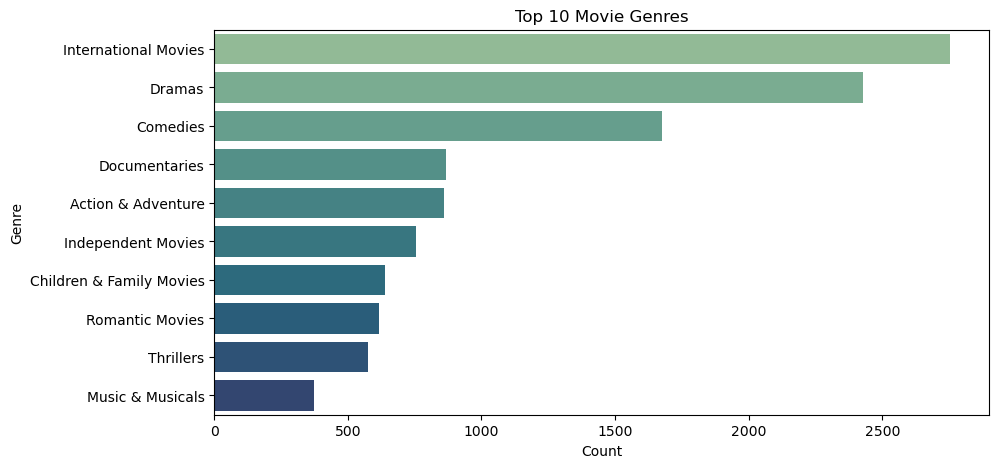

In [156]:
plt.figure(figsize=(10,5))
sns.barplot(data=movie_genre_total.sort_values(by="Count",axis=0, ascending=False).head(10), y="Genre", x="Count", palette = "crest")
plt.title("Top 10 Movie Genres");
plt.xlim(0, 2900);

*
*
*
*

TOP 10 TV SHOW GENRES

*
*
*
*

In [102]:
#FILTERED TV SHOWS
tv_show = df3_exploded[df3_exploded["type"] == "TV SHOW"]

In [144]:
#GROUP ALL TV SHOWS BY GENRE
tv_show_genre_total = tv_show.groupby(["Genre","type"]).size().reset_index(name="Count")

In [148]:
#SORTED TV SHOWS BY TOTAL GENRE
tv_show_genre_sorted = tv_show_genre_total.sort_values(by="Count",axis=0, ascending=False).head(10)

In [149]:
#IDENTIFIED TOP 10 TV SHOWS
top10_tv_shows = tv_show_genre_sorted["Genre"][:11]

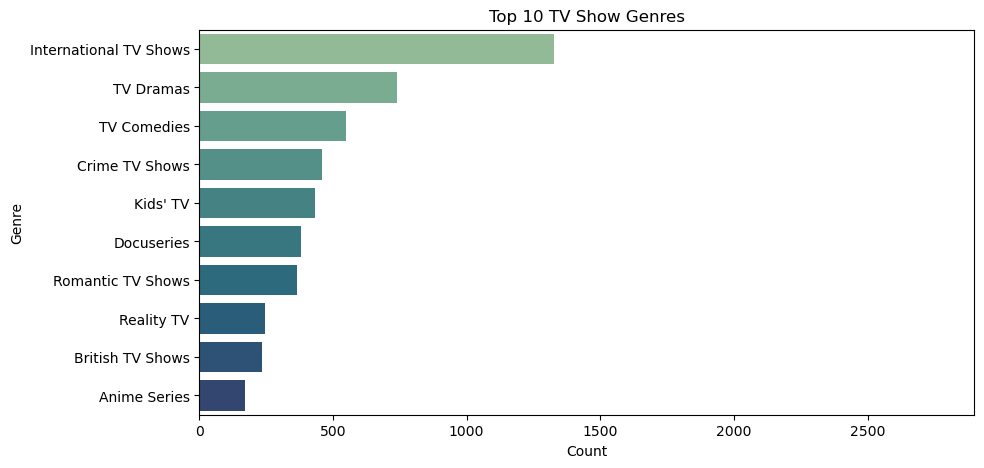

In [157]:
plt.figure(figsize=(10,5))
sns.barplot(data=tv_show_genre_sorted, y="Genre", x="Count", palette = "crest")
plt.title("Top 10 TV Show Genres");
plt.xlim(0, 2900);

In [160]:
genre_total = df3_exploded.groupby(["Genre","type"]).size().reset_index(name="Count")

In [161]:
genre_sorted = genre_total.sort_values(by="Count",axis=0, ascending=False).head(10)

In [162]:
top10_genres = genre_sorted["Genre"][:11]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'Independent Movies'),
  Text(7, 0, 'TV Dramas'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies')])

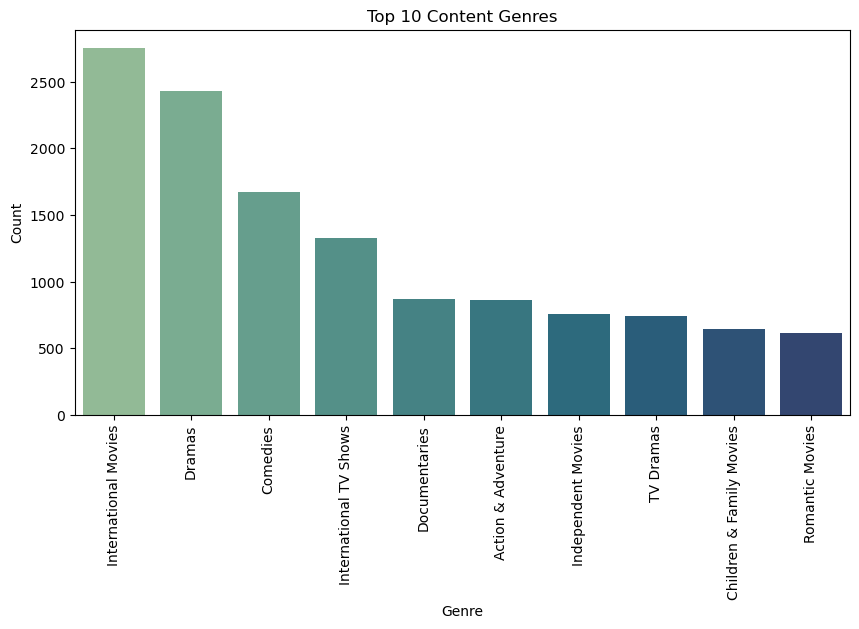

In [171]:
plt.figure(figsize=(10,5))
sns.barplot(data=genre_sorted, x="Genre", y="Count", palette = "crest")
plt.title("Top 10 Content Genres");
plt.xticks(rotation = 90)
#plt.xlim(0, 2900);

*
*
*
*

TOP 10 GENRES ACROSS ALL CONTENT

*
*
*
*

In [107]:
#IDENTIFIED TOP 10 GENRES ACROSS ALL CONTENTS
top = df3_exploded.groupby(["Genre"]).size().reset_index(name="count").sort_values(by="count",axis=0, ascending=False).head(10)

In [108]:
#IDENTIFIED TOP 10 GENRES ACROSS ALL CONTENTS
top10 = top["Genre"][:11]

In [109]:
#FILTER ONLY THOSE TOP 10
chosen_genres = df3_exploded[df3_exploded["Genre"].isin(top10)]

In [110]:
#FILTER YEAR TO 2015+
chosen_year = chosen_genres[chosen_genres["Year Added"] >= 2015]

In [111]:
#GROUP ALL BY YEAR
genre_by_year = chosen_year.groupby(["type","Genre","Year Added"]).size().reset_index(name="count")

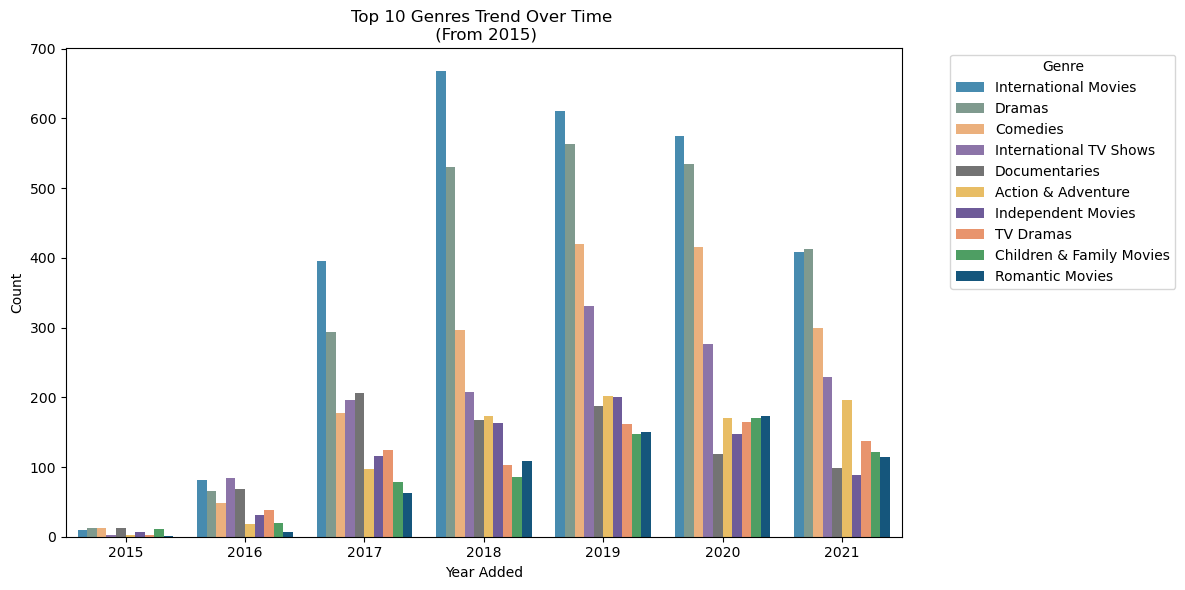

In [184]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_by_year, x="Year Added", y="count", hue="Genre", hue_order=top10, palette=["#3690c0", "#7a9f8e",  "#fdae6b", "#8c6bb1", "#737373", "#fec44f","#6a51a3", "#fc8d59","#41ab5d", "#045a8d",  "#000000"])
plt.title("Top 10 Genres Trend Over Time \n (From 2015)")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Genre")
plt.tight_layout()
plt.show()

*
*
*
*

Top 10 Movie Genres Trend Over Time

*
*
*
*

In [113]:
#GROUP MOVIES BY YEAR
movie_genre_by_year_total = movie.groupby(["Genre","type", "Year Added"]).size().reset_index(name='Total')

In [114]:
#FILTER ONLY TOP 10 MOVIES
chosen_movies_genres = df3_exploded[df3_exploded["Genre"].isin(top_10_movies)]

In [115]:
#FILTER YEAR TO 2015+
chosen_movies_year = chosen_genres[chosen_genres["Year Added"] >= 2015]

In [116]:
#GROUP ALL BY YEAR
movies_genre_by_year = chosen_movies_year.groupby(["type","Genre","Year Added"]).size().reset_index(name="Total")

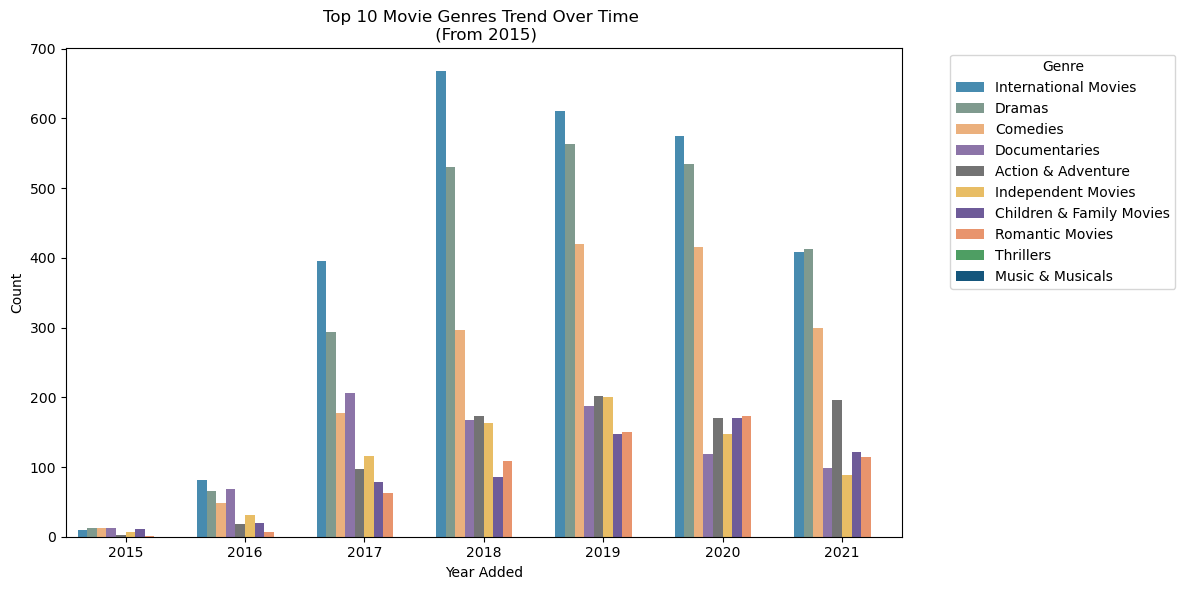

In [185]:
plt.figure(figsize=(12, 6))
sns.barplot(data=movies_genre_by_year, x="Year Added", y="Total", hue="Genre", hue_order=top_10_movies, palette=["#3690c0", "#7a9f8e",  "#fdae6b", "#8c6bb1", "#737373", "#fec44f","#6a51a3", "#fc8d59","#41ab5d", "#045a8d",  "#000000"])
plt.title("Top 10 Movie Genres Trend Over Time \n (From 2015)")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Genre")
plt.tight_layout()
plt.show()

*
*
*
*

Top 10 TV Show Genres Trend Over Time

*
*
*
*

In [118]:
#GROUP TV SHOWS BY YEAR
tv_show_genre_by_year_total = tv_show.groupby(["Genre","type", "Year Added"]).size().reset_index(name='Total')

In [119]:
#FILTER ONLY TOP 10 TV SHOWS
chosen_tv_show_genres = df3_exploded[df3_exploded["Genre"].isin(top10_tv_shows)]

In [120]:
#FILTER YEAR TO 2015+
chosen_tv_show_year = chosen_tv_show_genres[chosen_tv_show_genres["Year Added"] >= 2015]

In [121]:
#GROUP ALL BY YEAR
chosen_tv_show_by_year = chosen_tv_show_year.groupby(["type","Genre","Year Added"]).size().reset_index(name="Total")

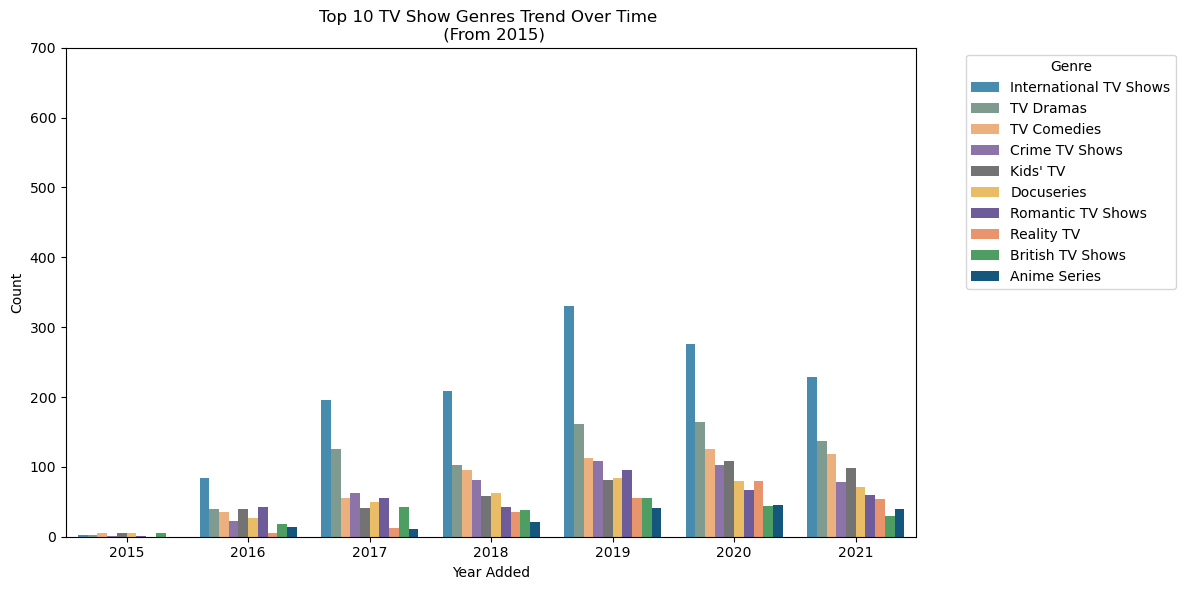

In [186]:
plt.figure(figsize=(12, 6))
sns.barplot(data=chosen_tv_show_by_year, x="Year Added", y="Total", hue="Genre", hue_order=top10_tv_shows, palette=["#3690c0", "#7a9f8e",  "#fdae6b", "#8c6bb1", "#737373", "#fec44f","#6a51a3", "#fc8d59","#41ab5d", "#045a8d",  "#000000"])
plt.title("Top 10 TV Show Genres Trend Over Time \n (From 2015)")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Genre")
plt.tight_layout()
plt.ylim(0, 700);
plt.show()

*
*
*

TOP 10 MOVIE COUNTRIES OVER TIME

*
*
*

In [123]:
#SPLIT COUNTRIES
df3["country"] = df3["country"].str.split(", ")
country_exploded = df3.explode("country")

In [124]:
#IGNORED UNKNOWN COUNTRIES
count_country1 = country_exploded[country_exploded["country"] != "Unknown"]

In [125]:
#COUNTED ALL COUNTRIES
count_country = count_country1.groupby(["country"]).size().reset_index(name="count").sort_values(by="count",axis=0, ascending=False).head(10)

In [126]:
#IDENTIFIED TOP 10 COUNTRIE
top10_country = count_country["country"][:11]

In [127]:
#FILTERED MOVIE COUNTRIES
country_movie = country_exploded[country_exploded["type"] == "MOVIE"]

In [128]:
#FILTERED YEAR COUNTRY
country_movie_year = country_movie[country_movie["Year Added"] >=2015]

In [129]:
#GROUP ALL BY YEAR
country_movie_year_total = country_movie_year.groupby(["country", "Year Added", "type"]).size().reset_index(name="Total")

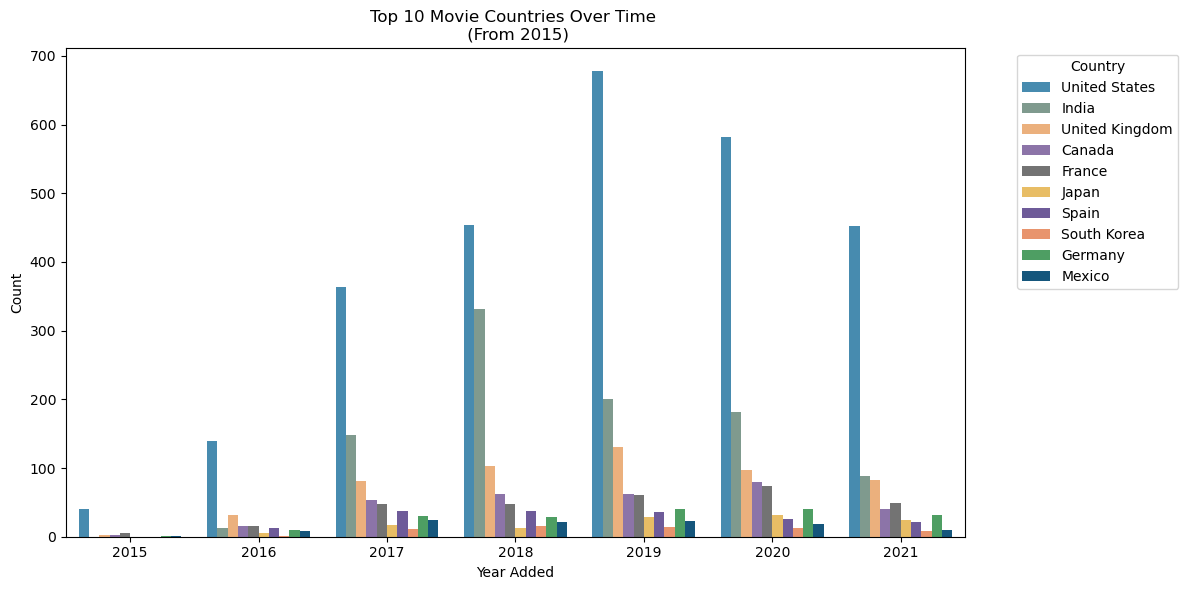

In [189]:
plt.figure(figsize=(12, 6))
sns.barplot(data=country_movie_year_total, x='Year Added', y="Total", hue="country", hue_order=top10_country, palette=["#3690c0", "#7a9f8e",  "#fdae6b", "#8c6bb1", "#737373", "#fec44f","#6a51a3", "#fc8d59","#41ab5d", "#045a8d",  "#000000"])
plt.title("Top 10 Movie Countries Over Time \n (From 2015)")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Country")
plt.tight_layout()
plt.show()

*
*
*

TOP 10 MOVIE COUNTRIES OVER TIME

*
*
*

In [131]:
#FILTERED MOVIE COUNTRIES
country_tv_show = country_exploded[country_exploded["type"] == "TV SHOW"]

In [132]:
#FILTERED YEAR COUNTRY
country_tv_show_year = country_tv_show[country_tv_show["Year Added"] >=2015]

In [133]:
#GROUP ALL BY YEAR
country_tv_show_year_total = country_tv_show_year.groupby(["country", "Year Added", "type"]).size().reset_index(name="Total")

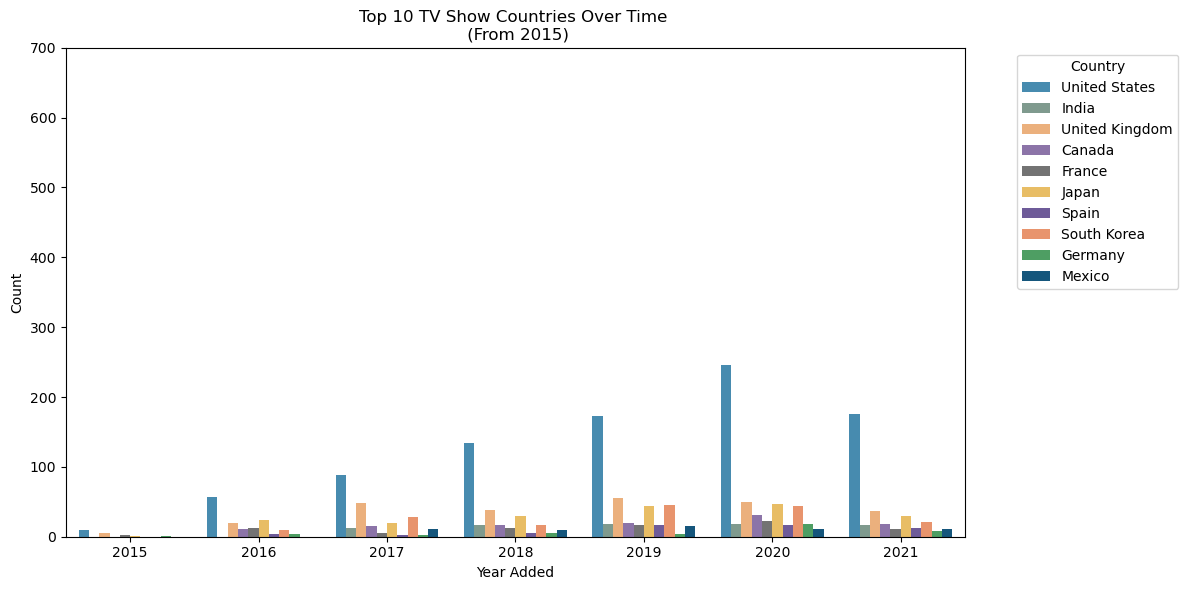

In [190]:
plt.figure(figsize=(12, 6))
sns.barplot(data=country_tv_show_year_total, x="Year Added", y="Total", hue="country", hue_order=top10_country, palette=["#3690c0", "#7a9f8e",  "#fdae6b", "#8c6bb1", "#737373", "#fec44f","#6a51a3", "#fc8d59","#41ab5d", "#045a8d",  "#000000"])
plt.title("Top 10 TV Show Countries Over Time \n (From 2015)")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Country")
plt.tight_layout()
plt.ylim(0, 700);
plt.show()

*
*
*

TOP 10 COUNTRIES

*
*
*

In [135]:
#SORTED TOP 10 COUNTRIES COUNT
count_country_top10 = count_country1["country"].value_counts().sort_values(ascending=False).head(10)

In [136]:
#FILTER TOP 10 COUNTRIES
country_top10 = country_exploded[country_exploded["country"].isin(count_country_top10.index)]

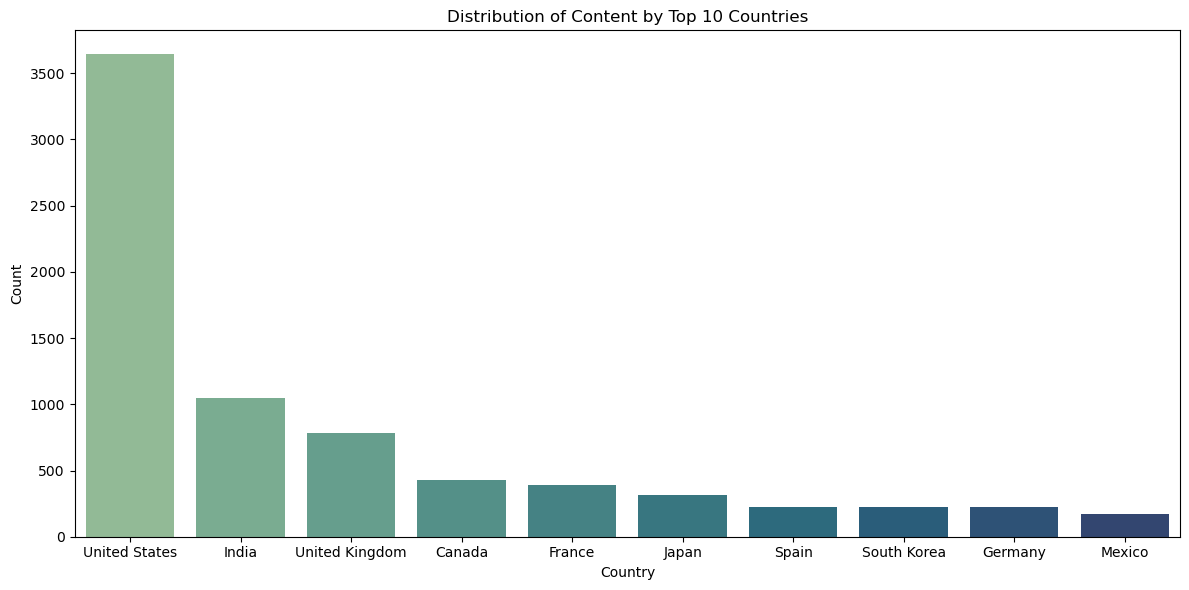

In [143]:
plt.figure(figsize=(12, 6))
sns.countplot(data=country_top10, x="country", palette="crest", order=count_country_top10.index)
plt.title("Distribution of Content by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\CDcrew\AppData\Local\Temp\ipykernel_14360\3076617797.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


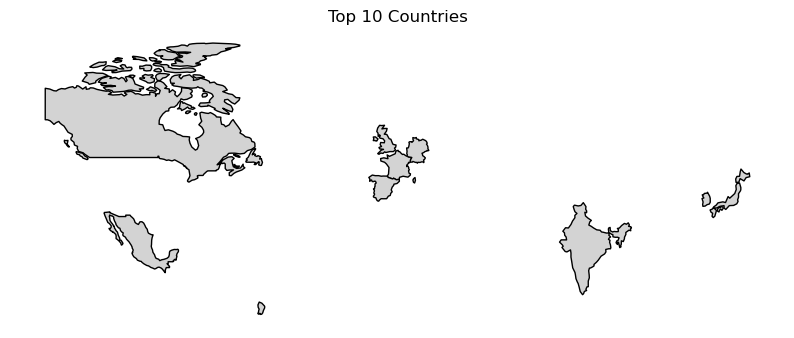

In [138]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the shapefile to include only the top 20 countries

filtered_world = world[world['name'].isin(count_country_top10.index)]

# Plot the filtered countries on a map
fig, ax = plt.subplots(figsize=(10, 6))
filtered_world.plot(ax=ax, color='lightgrey', edgecolor='black')
ax.set_title('Top 10 Countries')
plt.axis('off')
plt.show()

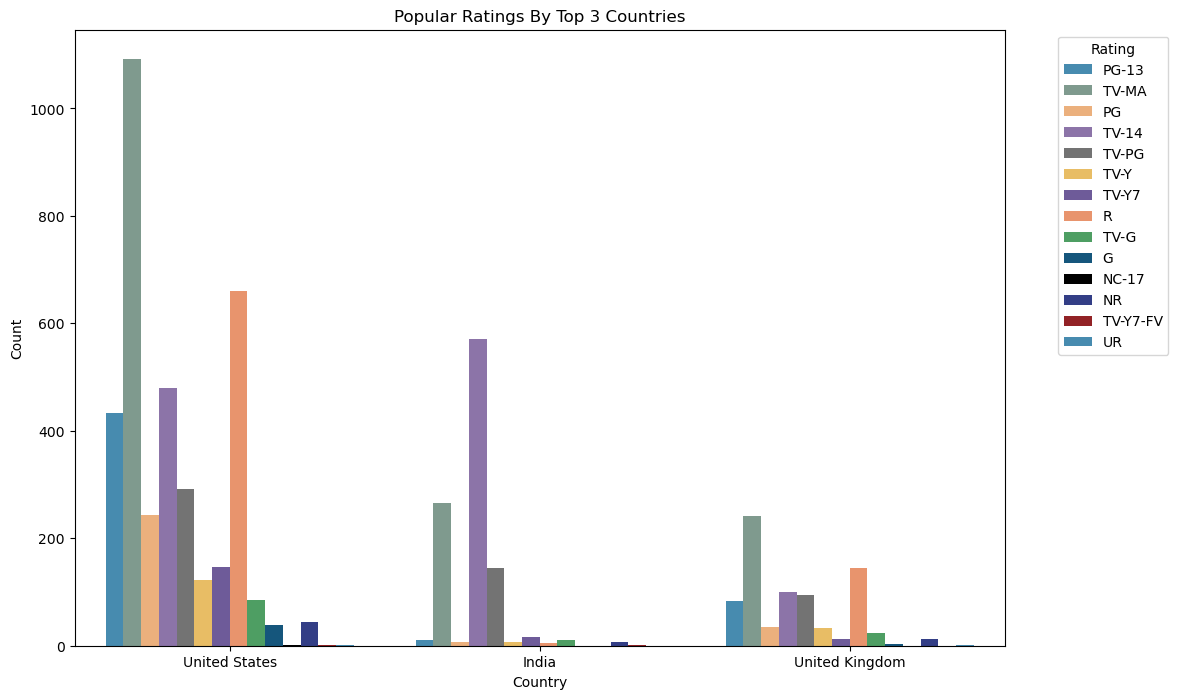

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(x = country_exploded['country'],order = count_country_top10[:3].index, hue =country_exploded['rating'],palette=["#3690c0", "#7a9f8e",  "#fdae6b", "#8c6bb1", "#737373", "#fec44f","#6a51a3", "#fc8d59","#41ab5d", "#045a8d",  "#000000", "#253494", "#a50f15"]).set(title='Popular Ratings By Top 3 Countries')
#plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Rating")
plt.ylabel("Count")
plt.xlabel("Country")
plt.show()